<a href="https://colab.research.google.com/github/akulkarni14/SDL-Practicals/blob/main/S%26DL_PR6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training set shape: (120, 1)
Validation set shape: (40, 1)
Test set shape: (40, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 1194.8419 - val_loss: 1166.1890
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1167.2648 - val_loss: 1157.6082
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1163.5432 - val_loss: 1149.3328
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1208.2919 - val_loss: 1141.0973
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1114.1555 - val_loss: 1132.9382
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1120.9929 - val_loss: 1123.9371
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1139.0049 - val_loss: 1114.1821
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1119.3510 - val_loss: 1103.8062
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1108.5131 - val_loss: 1092.5020
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1120.1364 - val_loss: 1080.1885
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1095.0281 -

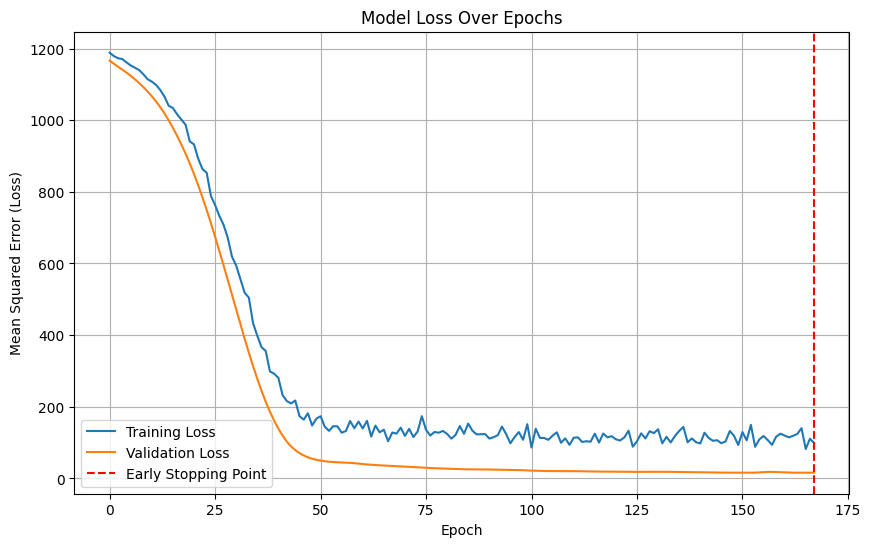

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- 1. Load and Prepare the Dataset ---
try:
    df = pd.read_csv('student_exam_scores.csv')
except FileNotFoundError:
    print("="*80)
    print("ERROR: 'student_exam_data.csv' not found.")
    print("Please make sure you have uploaded the dataset to your Colab session.")
    print("="*80)
    # Exit the script gracefully if the file isn't there.
    exit()

# Define features (X) and target (y)
features = ['hours_studied']
target = 'exam_score' # Corrected target column name

X = df[features]
y = df[target]

# --- 2. Data Splitting and Preprocessing ---
# Split data into training (60%), validation (20%), and testing (20%) sets.
# The validation set is crucial for early stopping.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features. This is vital for neural networks.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Validation set shape: {X_val_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")


# --- 3. Build the Perceptron Model with Regularization and Dropout ---
# This model incorporates all three requested techniques.
model = tf.keras.Sequential([
    # Input Layer
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),

    # Hidden Layer 1 with L2 Regularization and Dropout
    tf.keras.layers.Dense(
        64,
        activation='relu',
        # L2 Regularization penalizes large weights to prevent overfitting.
        kernel_regularizer=tf.keras.regularizers.l2(0.01)
    ),
    # Dropout randomly sets a fraction of input units to 0 at each update
    # during training to prevent neurons from co-adapting.
    tf.keras.layers.Dropout(0.5),

    # Hidden Layer 2 (also with regularization and dropout)
    tf.keras.layers.Dense(
        32,
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(0.01)
    ),
    tf.keras.layers.Dropout(0.5),

    # Output Layer (a single neuron for the predicted exam score)
    tf.keras.layers.Dense(1)
])

# Display the model's architecture
model.summary()


# --- 4. Compile the Model and Set Up Early Stopping ---
model.compile(
    optimizer='adam',
    # Mean Squared Error is a standard loss function for regression tasks.
    loss='mean_squared_error'
)

# Early Stopping callback:
# This will monitor the validation loss and stop the training if it doesn't
# improve for a certain number of epochs ('patience').
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15, # Number of epochs with no improvement after which training will be stopped.
    verbose=1,
    restore_best_weights=True # Restores model weights from the epoch with the best val_loss.
)


# --- 5. Train the Model ---
print("\nStarting model training...")
# We set a large number of epochs (200), but early stopping will likely
# halt the training much sooner.
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=200,
    validation_data=(X_val_scaled, y_val),
    # We pass the early stopping callback here.
    callbacks=[early_stopping],
    verbose=1
)
print("Model training finished.")


# --- 6. Evaluate the Final Model ---
# Evaluate the model on the unseen test data to get the final performance.
test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nFinal Mean Squared Error on Test Data: {test_loss:.2f}")


# --- 7. Visualize Training History ---
# Plotting the training and validation loss helps visualize the effect of our techniques.
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.grid(True)
# The vertical line shows where early stopping halted the training.
plt.axvline(x=len(history.history['loss'])-1, color='r', linestyle='--', label='Early Stopping Point')
plt.legend()
plt.show()
